In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Time Series Prediction/Finance Dataset/uci_electricity-monthly_sum.csv'

df = pd.read_csv(file_path)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df = df[:'2014-12-31']

print(df.head())

            Total_Consumption
Timestamp                    
2011-01-31       3.409615e+08
2011-02-28       3.098603e+08
2011-03-31       3.431288e+08
2011-04-30       3.568466e+08
2011-05-31       3.842044e+08


# First forecasting using statistical model (ExponentialSmoothing) to have a benchmark

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


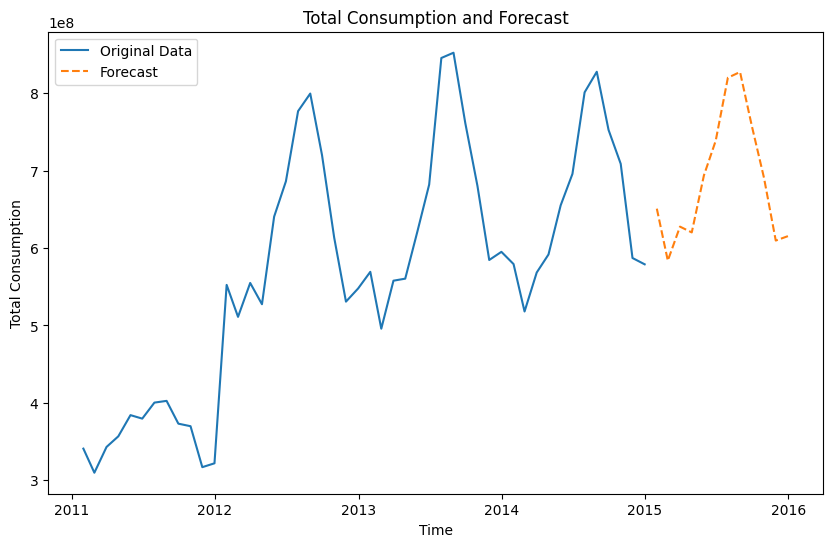

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_smoothing_model = ExponentialSmoothing(df['Total_Consumption'],
                                           trend='add',
                                           seasonal='add',
                                           seasonal_periods=12).fit()

forecast = exp_smoothing_model.forecast(12)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total_Consumption'], label='Original Data')
plt.plot(pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', linestyle='--')
plt.title('Total Consumption and Forecast')
plt.xlabel('Time')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


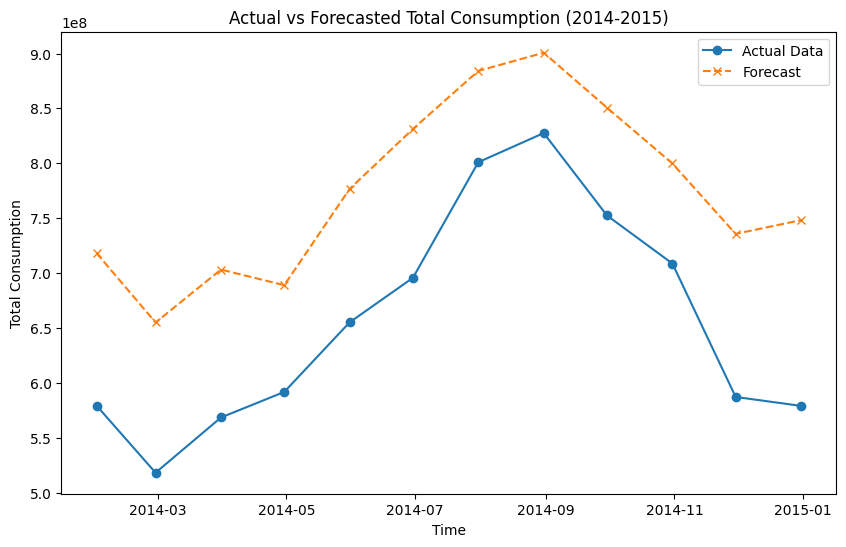

,Actual,Forecast
2014-01-31,5.792071e+08,7.181469e+08
2014-02-28,5.180244e+08,6.549286e+08
2014-03-31,5.683435e+08,7.031165e+08
2014-04-30,5.916219e+08,6.889078e+08
2014-05-31,6.550546e+08,7.766174e+08
2014-06-30,6.956163e+08,8.312372e+08
2014-07-31,8.009548e+08,8.841217e+08
2014-08-31,8.275113e+08,9.007092e+08
2014-09-30,7.524093e+08,8.506524e+08
2014-10-31,7.086301e+08,7.998127e+08


In [4]:
train_data = df[:'2013-12-31']
test_data = df['2014-01-01':'2015-12-31']

exp_smoothing_model_train = ExponentialSmoothing(train_data['Total_Consumption'],
                                                 trend='add',
                                                 seasonal='add',
                                                 seasonal_periods=12).fit()

# Generate forecasts for the test period (2014 to 2015)
forecast_test_period = exp_smoothing_model_train.forecast(len(test_data))

comparison_df = pd.DataFrame({'Actual': test_data['Total_Consumption'], 'Forecast': forecast_test_period})

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual Data', marker='o')
plt.plot(comparison_df.index, comparison_df['Forecast'], label='Forecast', linestyle='--', marker='x')
plt.title('Actual vs Forecasted Total Consumption (2014-2015)')
plt.xlabel('Time')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()

comparison_df

In [5]:
from sklearn.metrics import mean_absolute_error
import itertools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

trend_options = [None, 'add', 'mul']
seasonal_options = [None, 'add', 'mul']
seasonal_periods = 12

best_mae = float('inf')
best_params = None

for trend, seasonal in itertools.product(trend_options, seasonal_options):
    if trend is None and seasonal is None:
        continue
    try:
        model = ExponentialSmoothing(train_data,
                                     trend=trend,
                                     seasonal=seasonal,
                                     seasonal_periods=seasonal_periods).fit()

        predictions = model.forecast(len(test_data))

        mae = mean_absolute_error(test_data, predictions)

        if mae < best_mae:
            best_mae = mae
            best_params = (trend, seasonal)
    except Exception as e:
        print(f"An error occurred with trend={trend} and seasonal={seasonal}: {e}")
        continue

print(f"Best Parameters: {best_params}, Best MAE: {best_mae}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/

Best Parameters: (None, 'add'), Best MAE: 50772403.6458566


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/

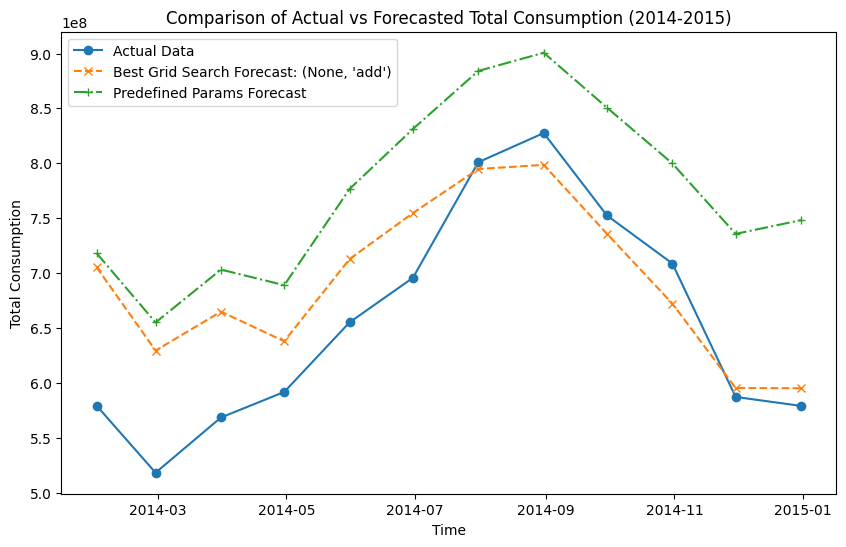

In [6]:
import itertools

trend_options = [None, 'add', 'mul']
seasonal_options = [None, 'add', 'mul']
seasonal_periods = 12

train = df[:'2013-12-31']
test = df['2014-01-01':]

best_mae_grid = float('inf')
best_params_grid = None

for trend, seasonal in itertools.product(trend_options, seasonal_options):
    if trend is None and seasonal is None:
        continue  # Skip invalid combination
    try:
        model_grid = ExponentialSmoothing(train_data['Total_Consumption'],
                                          trend=trend, seasonal=seasonal,
                                          seasonal_periods=seasonal_periods).fit()
        forecast_grid = model_grid.forecast(len(test_data))
        mae_grid = mean_absolute_error(test_data['Total_Consumption'], forecast_grid)
        if mae_grid < best_mae_grid:
            best_mae_grid = mae_grid
            best_params_grid = (trend, seasonal)
    except Exception as e:
        print(f"Error with parameters trend={trend}, seasonal={seasonal}: {e}")
        continue

# Fit models with the best parameters from grid search and the predefined parameters
model_best_grid = ExponentialSmoothing(train_data['Total_Consumption'],
                                       trend=best_params_grid[0], seasonal=best_params_grid[1],
                                       seasonal_periods=seasonal_periods).fit()
forecast_best_grid = model_best_grid.forecast(len(test_data))

model_predefined = ExponentialSmoothing(train_data['Total_Consumption'],
                                        trend='add', seasonal='add',
                                        seasonal_periods=seasonal_periods).fit()
forecast_predefined = model_predefined.forecast(len(test_data))

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Total_Consumption'], label='Actual Data', marker='o')
plt.plot(test_data.index, forecast_best_grid, label=f'Best Grid Search Forecast: {best_params_grid}', linestyle='--', marker='x')
plt.plot(test_data.index, forecast_predefined, label='Predefined Params Forecast', linestyle='-.', marker='+')
plt.title('Comparison of Actual vs Forecasted Total Consumption (2014-2015)')
plt.xlabel('Time')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()

# Forecasting using N-BEATS

In [7]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40

In [8]:
pip install 'u8darts[torch]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 15.7 MB/s eta 0:00:00


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

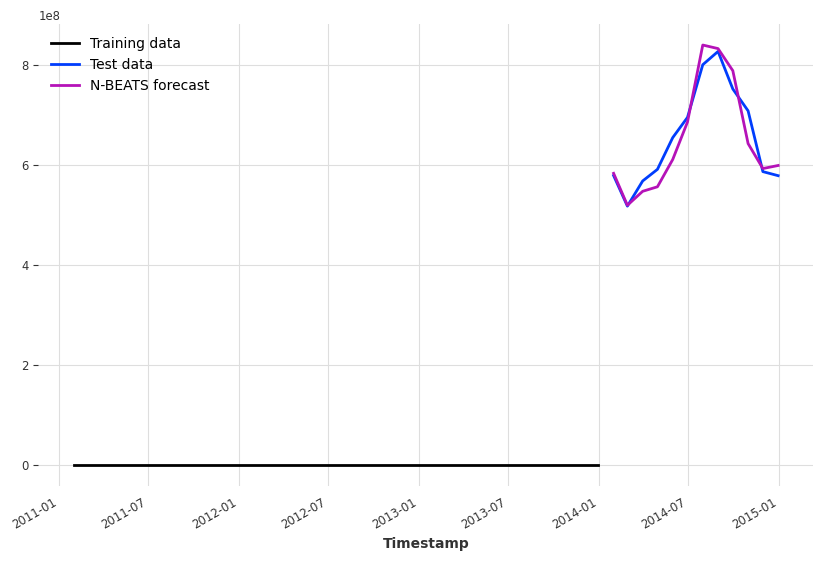

In [9]:
from darts import TimeSeries
from darts.models import NBEATSModel
import matplotlib.pyplot as plt
from darts.dataprocessing.transformers import Scaler

series = TimeSeries.from_dataframe(df, value_cols=['Total_Consumption'])

scaler = Scaler()
series_scaled = scaler.fit_transform(series)

train, test = series_scaled.split_before(pd.Timestamp('2014-01-01'))

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)
model.fit(train)

prediction = model.predict(len(test))

test_rescaled = scaler.inverse_transform(test)
prediction_rescaled = scaler.inverse_transform(prediction)

plt.figure(figsize=(10, 6))
train.plot(label='Training data')
test_rescaled.plot(label='Test data')
prediction_rescaled.plot(label='N-BEATS forecast')
plt.legend();

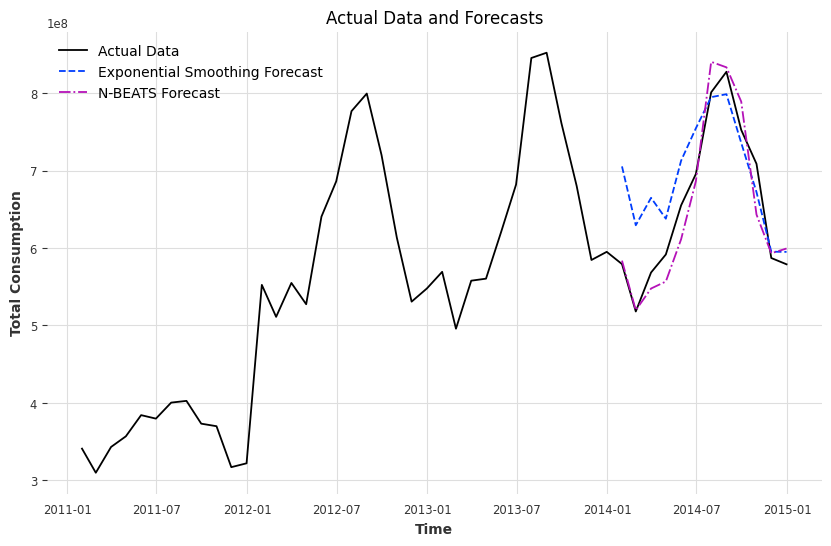

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total_Consumption'], label='Actual Data')
plt.plot(test_data.index, forecast_best_grid, label='Exponential Smoothing Forecast', linestyle='--')
plt.plot(test_rescaled.time_index, prediction_rescaled.values(), label='N-BEATS Forecast', linestyle='-.')
plt.title('Actual Data and Forecasts')
plt.xlabel('Time')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()


## Grid Search

In [11]:
import itertools
import torch
from torch.optim import Adam, SGD, RMSprop
import pandas as pd
import time
import logging
from tqdm import tqdm
from darts.models.forecasting.nbeats import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape

logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)
logging.getLogger('torch').setLevel(logging.ERROR)

if torch.cuda.is_available():
    device = "GPU"
else:
    device = "CPU"

search_space = {
    'input_chunk_length': [6],
    'output_chunk_length': [6],
    'num_blocks': [1, 3, 5],
    'num_layers': [2, 4, 6],
    'layer_widths': [64, 128],
    'dropout': [0.1],
    'learning_rate': [0.01, 0.001, 0.0001],
    'optimizer': [Adam, SGD, RMSprop],
    'batch_size': [4, 8, 16]
}

search_combinations = list(itertools.product(*(search_space[key] for key in search_space)))

results_df = pd.DataFrame(columns=list(search_space.keys()) + ['MAPE'])

scaler = Scaler()
train_scaled = scaler.fit_transform(train)

best_mape = float('inf')
best_params = {}
start_time = time.time()

# Run grid search
for idx, combination in enumerate(search_combinations):
    config = dict(zip(search_space.keys(), combination))
    model = NBEATSModel(
        input_chunk_length=config['input_chunk_length'],
        output_chunk_length=config['output_chunk_length'],
        num_blocks=config['num_blocks'],
        num_layers=config['num_layers'],
        layer_widths=config['layer_widths'],
        dropout=config['dropout'],
        batch_size=config['batch_size'],
        n_epochs=3,
        random_state=0,
        optimizer_cls=config['optimizer'],
        optimizer_kwargs={'lr': config['learning_rate']},
        pl_trainer_kwargs={"accelerator": "gpu", "devices": 1, "logger": False, "enable_progress_bar": False}
    )

    model.fit(train_scaled, verbose=False)
    prediction = model.predict(len(test))
    prediction_rescaled = scaler.inverse_transform(prediction)
    test_rescaled = scaler.inverse_transform(test)

    current_mape = mape(test_rescaled, prediction_rescaled)
    results_df.loc[len(results_df)] = list(combination) + [current_mape]

    print(f"Tested: {config}, MAPE: {current_mape:.4f}")

    if current_mape < best_mape:
        best_mape = current_mape
        best_params = config

results_df.to_csv('nbeats_grid_search_results.csv', index=False)

elapsed_time = time.time() - start_time
print("Grid Search Completed on", device)
print(f"Best Parameters: {best_params}")
print(f"Best MAPE: {best_mape:.4f}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 1, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 44.8259
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 1, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 49.5331
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 1, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 77.8397
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 1, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 4}, MAPE: 22.7276
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 1, 

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: 354891096332510.3125
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: 10461777515722806657024.0000
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: 56273578490280154249222960821619

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 39.6596
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 63.6956
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 102.4085
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 30.5413
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 56.5048
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 3, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 85.5508
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: 10130.6799
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: 235124.9641
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: 1072938.0369
Tested: {'input_chunk_length': 6, 'output_chunk_le

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: 510211905025362186661463108645964690046189726513382617078276501510547427894876823615348601507379788451843802037985009276227830452690995400200731032577667429314733342437465626461723006200015109884879318630055317165191085424640.0000
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 2, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: 2623965083725941943706626694321596618518491387998651451737044576086991251426379450

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 83.6467
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 36.7162
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 4, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 138.8029
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 48.5224
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 64.3724
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 64, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 65.1774
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_bloc

/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 4}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 8}, MAPE: nan


/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:1902: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/usr/local/lib/python3.10/dist-packages/darts/metrics/metrics.py:242: RuntimeWarning: Mean of empty slice
  vals = np.expand_dims(component_reduction(vals, axis=COMP_AX), axis=COMP_AX)


Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.01, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'batch_size': 16}, MAPE: nan
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 4}, MAPE: 44.3180
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 8}, MAPE: 58.1166
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num_blocks': 5, 'num_layers': 6, 'layer_widths': 128, 'dropout': 0.1, 'learning_rate': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'batch_size': 16}, MAPE: 102.5490
Tested: {'input_chunk_length': 6, 'output_chunk_length': 6, 'num